In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

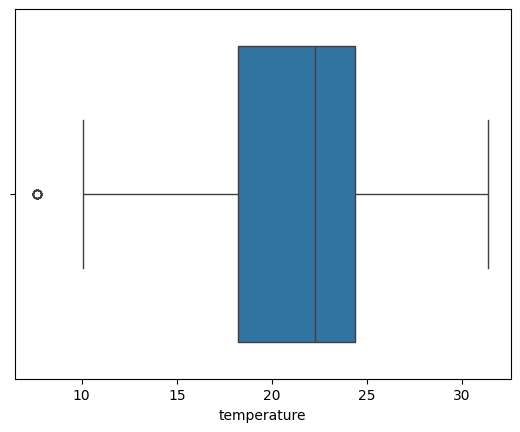

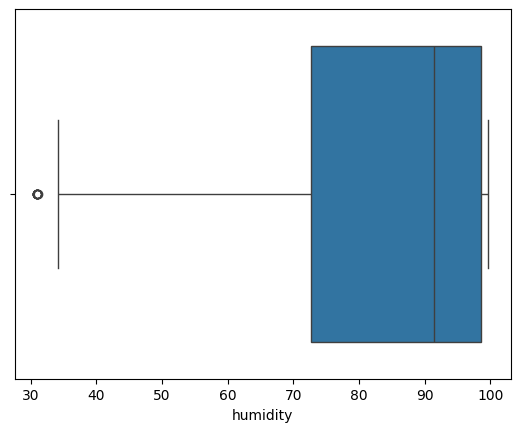

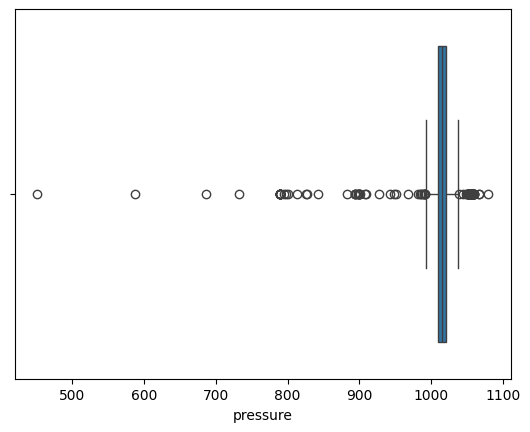

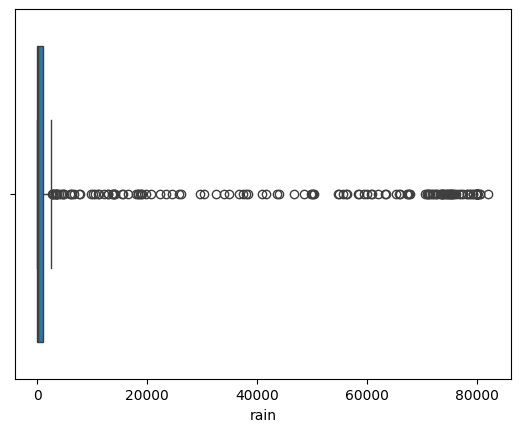

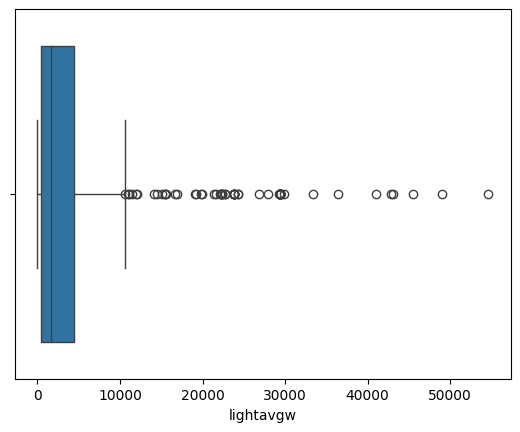

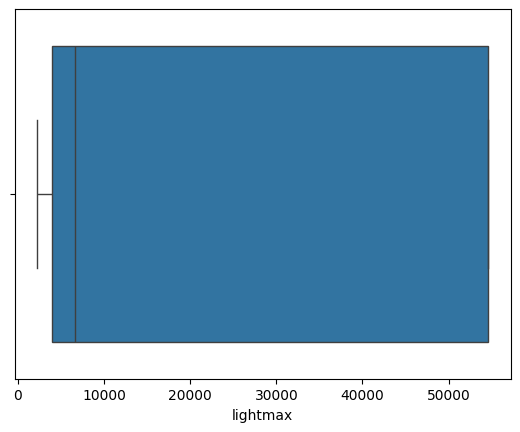

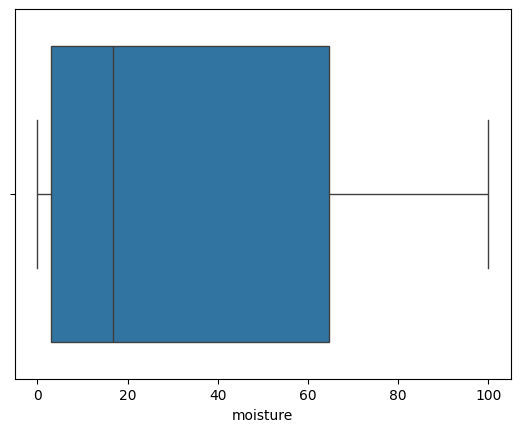

In [2]:
df1 = pd.read_csv("Datasets/landslide_data_original.csv")
df1 = df1[["temperature", "humidity", "pressure", "rain", "lightavgw", "lightmax", "moisture"]]
df2=df1
for i in df1.columns:
    sns.boxplot(x=i, data=df1)
    plt.show()

In [3]:
print("Attribute \t No. of Outliers")
for i in df1.columns:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3-Q1
    count=0
    for j in df1[i]:
        if j<Q1-1.5*IQR or j>Q3+1.5*IQR:
            count+=1
    print(i, "\t", count)

Attribute 	 No. of Outliers
temperature 	 10
humidity 	 8
pressure 	 132
rain 	 184
lightavgw 	 85
lightmax 	 0
moisture 	 0


In [4]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
median = df1.median()
lb = Q1-1.5*IQR
ub = Q3+1.5*IQR
outliers = (df1 < lb) | (df1 > ub)
print(outliers.sum())

temperature     10
humidity         8
pressure       132
rain           184
lightavgw       85
lightmax         0
moisture         0
dtype: int64


In [5]:
# Replacig with median

for i in df1.columns:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    ub = Q3+1.5*IQR
    median = df1[i].median()
    df1.loc[df1[i] > ub, i] = median
    df1.loc[df1[i] < lb, i] = median
df1.to_csv("landslide_data_corrected.csv")

In [6]:
# After Correction

print("Attribute \t No. of Outliers")
for i in df1.columns:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3-Q1
    count=0
    for j in df1[i]:
        if j<Q1-1.5*IQR or j>Q3+1.5*IQR:
            count+=1
    print(i, "\t", count)

Attribute 	 No. of Outliers
temperature 	 0
humidity 	 25
pressure 	 11
rain 	 192
lightavgw 	 0
lightmax 	 0
moisture 	 0


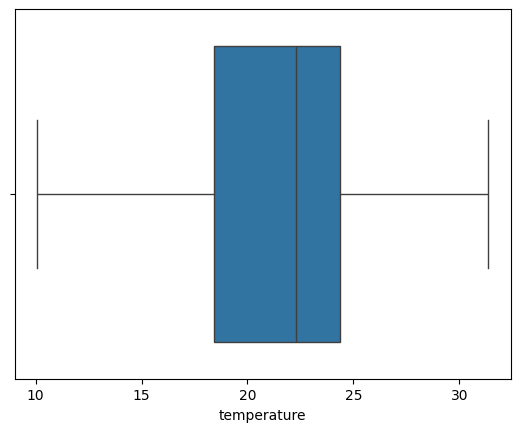

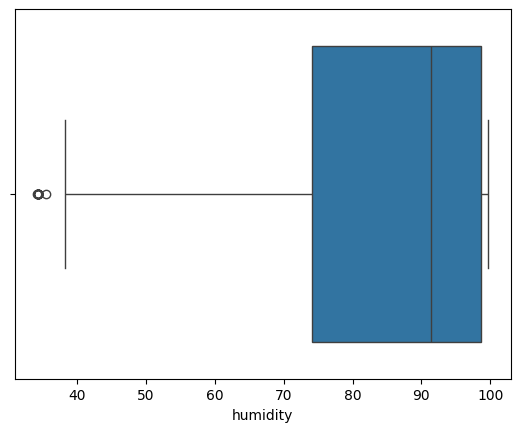

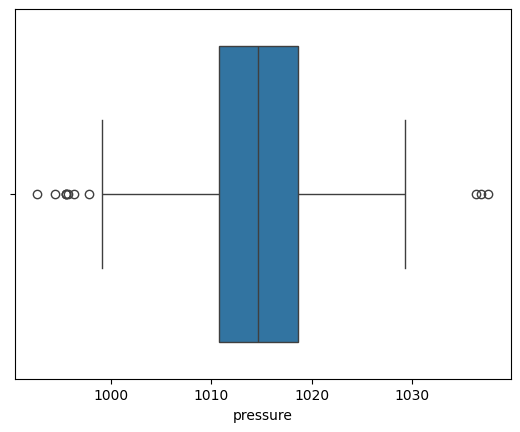

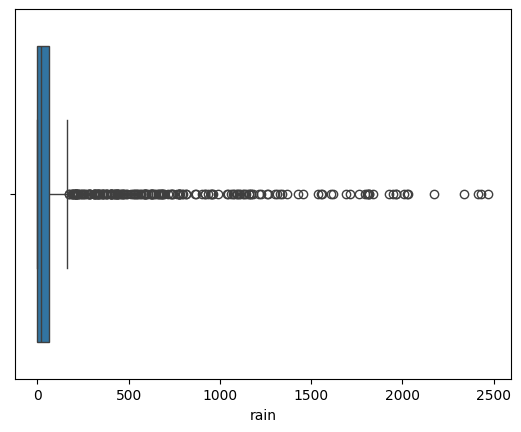

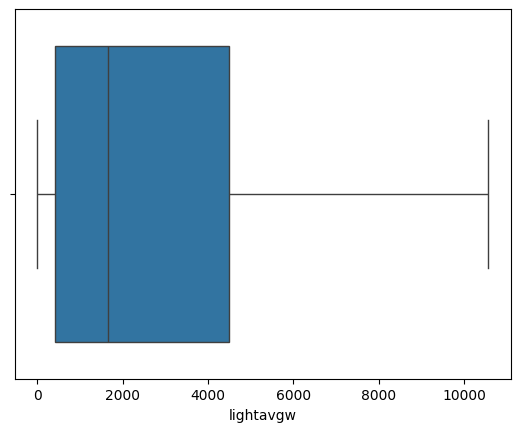

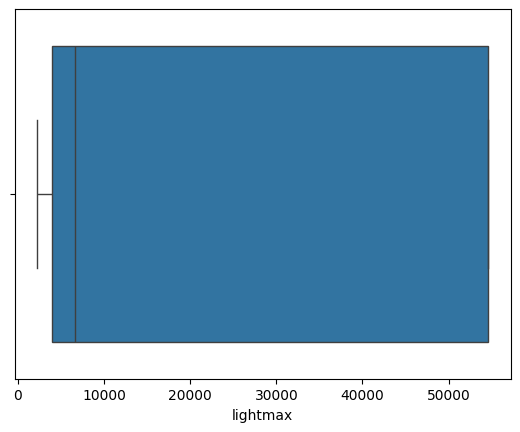

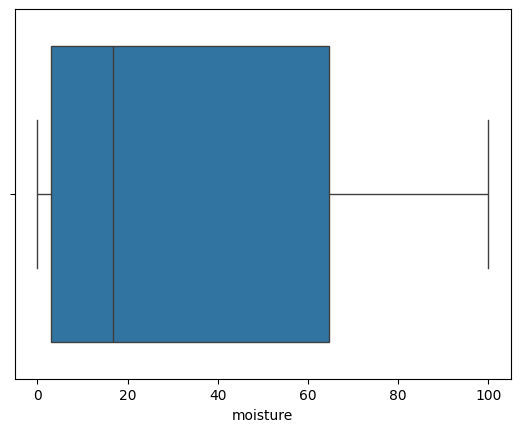

In [7]:
for i in df1.columns:
    sns.boxplot(x=i, data=df1)
    plt.show()

### Correlation

In [8]:
print("Pearson's Coeffecients")
pearson_corr = df1.corr(method='pearson')
pearson_corr

Pearson's Coeffecients


,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
temperature,1.000000,0.390199,-0.474969,0.078539,-0.082871,-0.184258,0.057014
humidity,0.390199,1.000000,-0.434660,0.214362,-0.164206,-0.271069,-0.001248
pressure,-0.474969,-0.434660,1.000000,-0.155556,0.193551,0.112807,0.093579
rain,0.078539,0.214362,-0.155556,1.000000,0.061002,-0.009647,0.169460
lightavgw,-0.082871,-0.164206,0.193551,0.061002,1.000000,0.674637,-0.066839
lightmax,-0.184258,-0.271069,0.112807,-0.009647,0.674637,1.000000,0.005725
moisture,0.057014,-0.001248,0.093579,0.169460,-0.066839,0.005725,1.000000


In [9]:
print("Spearman's Coeffecients")
spearman_corr = df1.corr(method='spearman')
spearman_corr

Spearman's Coeffecients


,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
temperature,1.000000,0.260195,-0.542347,0.201006,-0.141109,-0.172820,0.061563
humidity,0.260195,1.000000,-0.463449,0.291729,-0.143485,-0.251758,0.039543
pressure,-0.542347,-0.463449,1.000000,-0.201066,0.172845,0.128289,0.073985
rain,0.201006,0.291729,-0.201066,1.000000,0.097869,0.070359,0.390779
lightavgw,-0.141109,-0.143485,0.172845,0.097869,1.000000,0.824163,0.074309
lightmax,-0.172820,-0.251758,0.128289,0.070359,0.824163,1.000000,0.075334
moisture,0.061563,0.039543,0.073985,0.390779,0.074309,0.075334,1.000000


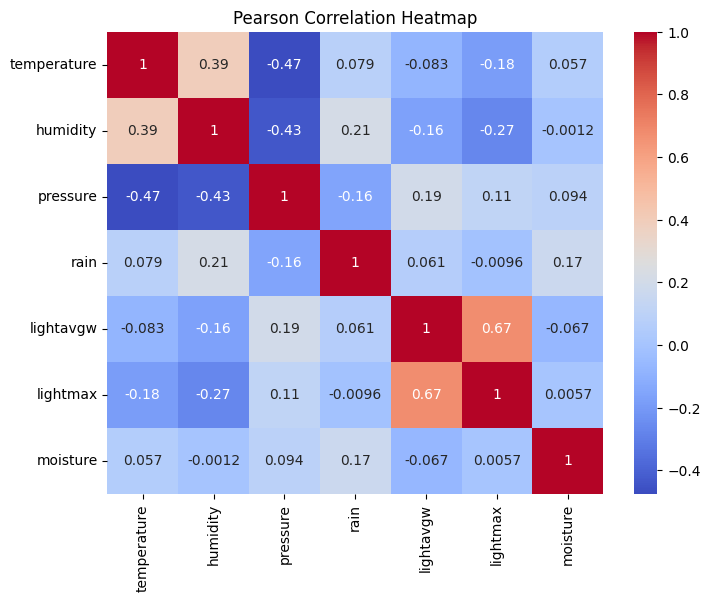

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap")
plt.show()

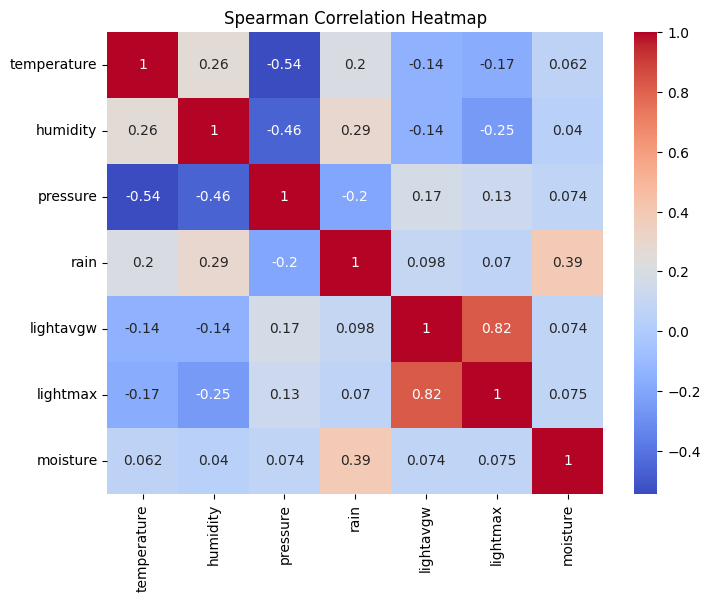

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [12]:
for i in df1.columns:
    for j in df1.columns:
        if (pearson_corr[i][j]==1  or pearson_corr[i][j]==-1):
            print(i,"\t",j,"\t", "Perfect")
        elif (abs(pearson_corr[i][j]) > 0.5  and abs(pearson_corr[i][j])<=1):
            print(i, "\t", j, "\t", "Very Strong")
        elif (abs(pearson_corr[i][j]) > 0.3  and abs(pearson_corr[i][j])<=0.5):
            print(i, "\t", j, "\t", "Strong")
        elif (abs(pearson_corr[i][j]) > 0.1  and abs(pearson_corr[i][j])<=0.3):
            print(i, "\t", j, "\t", "Moderate")
        elif (abs(pearson_corr[i][j]) > 0.0  and abs(pearson_corr[i][j])<=0.1):
            print(i, "\t", j, "\t", "Weak")
        else:
            print(i, "\t", j, "\t", "No Correlation")

temperature 	 temperature 	 Perfect
temperature 	 humidity 	 Strong
temperature 	 pressure 	 Strong
temperature 	 rain 	 Weak
temperature 	 lightavgw 	 Weak
temperature 	 lightmax 	 Moderate
temperature 	 moisture 	 Weak
humidity 	 temperature 	 Strong
humidity 	 humidity 	 Perfect
humidity 	 pressure 	 Strong
humidity 	 rain 	 Moderate
humidity 	 lightavgw 	 Moderate
humidity 	 lightmax 	 Moderate
humidity 	 moisture 	 Weak
pressure 	 temperature 	 Strong
pressure 	 humidity 	 Strong
pressure 	 pressure 	 Perfect
pressure 	 rain 	 Moderate
pressure 	 lightavgw 	 Moderate
pressure 	 lightmax 	 Moderate
pressure 	 moisture 	 Weak
rain 	 temperature 	 Weak
rain 	 humidity 	 Moderate
rain 	 pressure 	 Moderate
rain 	 rain 	 Perfect
rain 	 lightavgw 	 Weak
rain 	 lightmax 	 Weak
rain 	 moisture 	 Moderate
lightavgw 	 temperature 	 Weak
lightavgw 	 humidity 	 Moderate
lightavgw 	 pressure 	 Moderate
lightavgw 	 rain 	 Weak
lightavgw 	 lightavgw 	 Perfect
lightavgw 	 lightmax 	 Very Strong
l

Before Outlier Correction


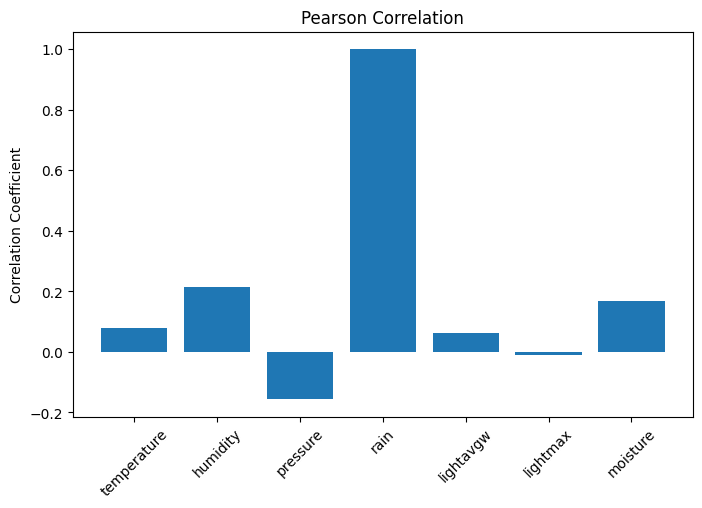

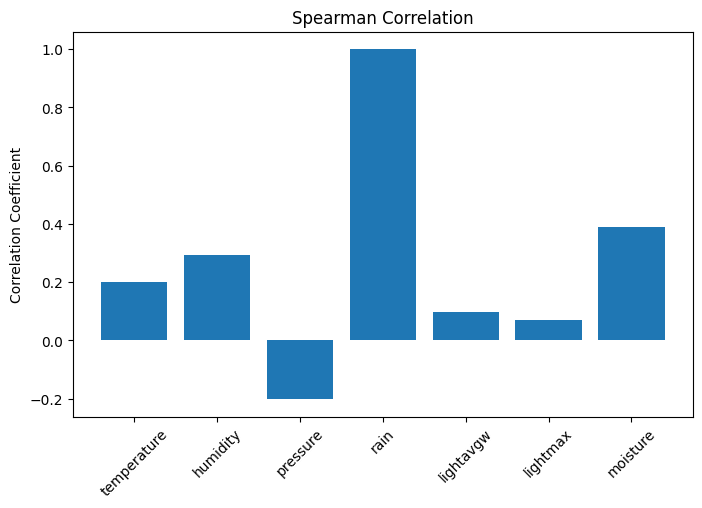

After Outlier Correction


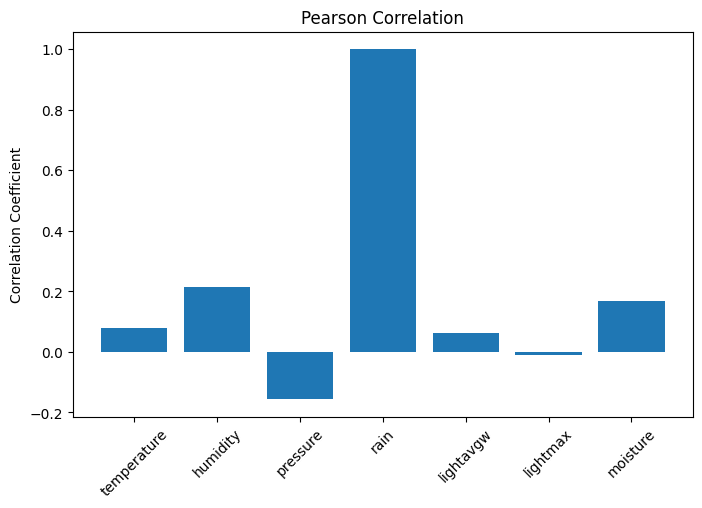

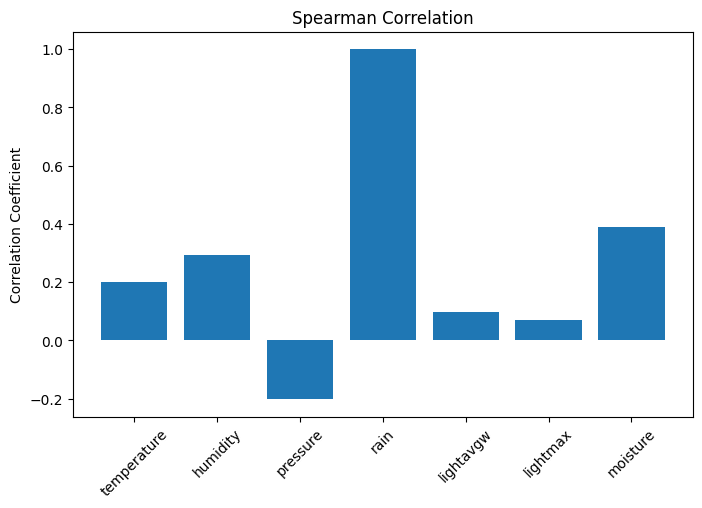

In [13]:
p1 = df2.corrwith(df2["rain"], method="pearson")
s1 = df2.corrwith(df2["rain"], method="spearman")

print("Before Outlier Correction")
plt.figure(figsize=(8, 5))
plt.bar(p1.index, p1.values)
plt.title("Pearson Correlation")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(s1.index, s1.values)
plt.title("Spearman Correlation")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()



p = df1.corrwith(df1["rain"], method="pearson")
s = df1.corrwith(df1["rain"], method="spearman")

print("After Outlier Correction")
plt.figure(figsize=(8, 5))
plt.bar(p.index, p.values)
plt.title("Pearson Correlation")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(s.index, s.values)
plt.title("Spearman Correlation")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


Scatter Plot between each attribute and the Rain


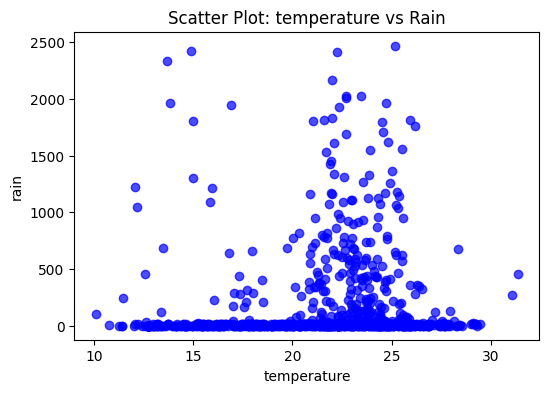

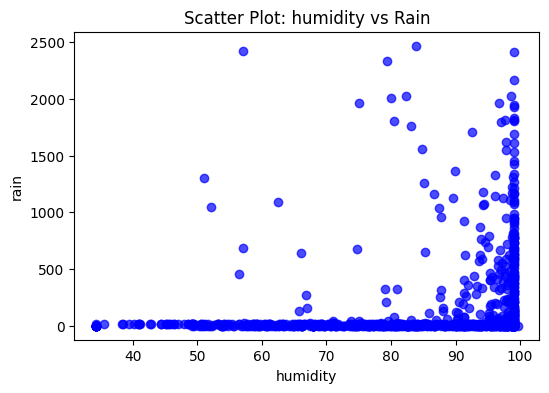

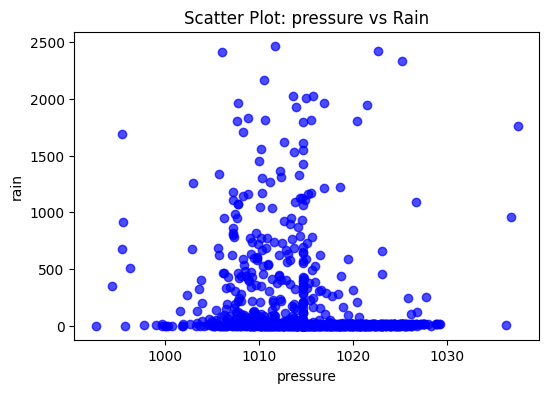

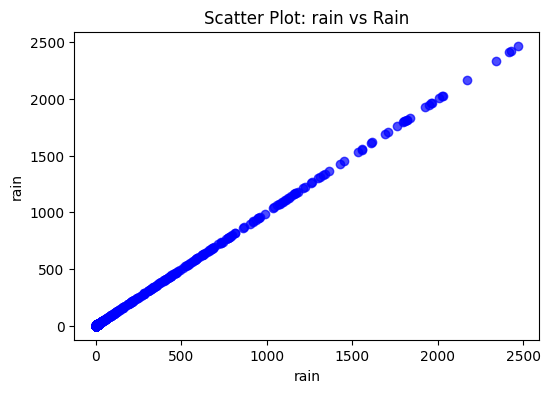

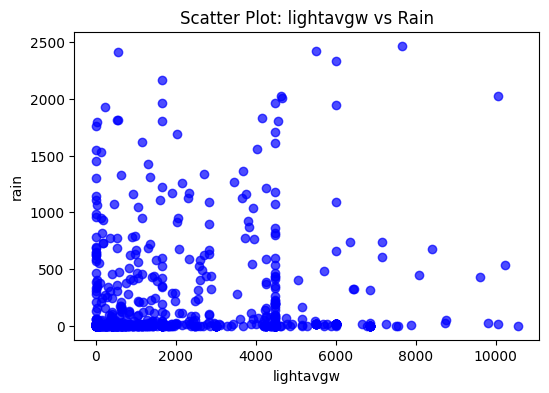

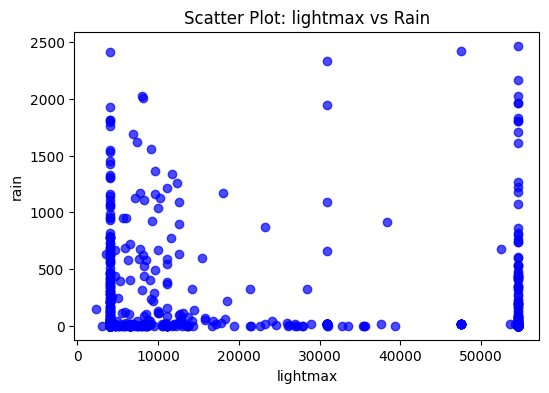

In [14]:
print("\nScatter Plot between each attribute and the Rain")
for col in df1.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.scatter(df1[col], df1["rain"], color='blue', alpha=0.7)
    plt.title(f"Scatter Plot: {col} vs Rain")
    plt.xlabel(col)
    plt.ylabel("rain")
    # plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

### Standardisation and Normalisation

In [15]:
print("Attribute \t \t Min \t \t Max")
for i in df1.columns:
    print(i, "\t \t", df1[i].min(), "\t \t", df1[i].max())

Attribute 	 	 Min 	 	 Max
temperature 	 	 10.08511 	 	 31.375
humidity 	 	 34.20567 	 	 99.72
pressure 	 	 992.6545833333 	 	 1037.6043859649
rain 	 	 0.0 	 	 2470.5
lightavgw 	 	 0.0 	 	 10565.3523
lightmax 	 	 2259 	 	 54612
moisture 	 	 0.0 	 	 100.0


In [16]:
scaled_df = (df1 - df1.min())/(df1.max() - df1.min())
scaled_df

,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.722580,0.732387,0.972024,0.002732,0.000521,0.033255,0.000000
1,0.756597,0.747065,1.000000,0.713115,0.001121,0.033255,0.056930
2,0.708557,0.780513,0.489952,0.264117,0.000830,0.033255,0.068511
3,0.667613,0.816324,0.983383,0.389800,0.000836,0.033255,0.060373
4,0.656843,0.815707,0.782566,0.102914,0.025993,0.039616,0.312385
...,...,...,...,...,...,...,...
940,0.308792,0.373821,0.759577,0.007286,0.522569,0.863389,0.544222
941,0.255507,0.442002,0.775102,0.007286,0.522569,0.863389,0.545674
942,0.269165,0.381704,0.815664,0.007286,0.522569,0.863389,0.548794
943,0.305337,0.311841,0.759108,0.007286,0.522569,0.863389,0.550286


In [17]:
print("Pearson's Coeffecients")
pearson_corr_scaled = scaled_df.corr(method='pearson')
print("Unscaled Data")
print(pearson_corr)
print("Scaled Data")
print(pearson_corr_scaled)

Pearson's Coeffecients
Unscaled Data
             temperature  humidity  pressure      rain  lightavgw  lightmax  \
temperature     1.000000  0.390199 -0.474969  0.078539  -0.082871 -0.184258   
humidity        0.390199  1.000000 -0.434660  0.214362  -0.164206 -0.271069   
pressure       -0.474969 -0.434660  1.000000 -0.155556   0.193551  0.112807   
rain            0.078539  0.214362 -0.155556  1.000000   0.061002 -0.009647   
lightavgw      -0.082871 -0.164206  0.193551  0.061002   1.000000  0.674637   
lightmax       -0.184258 -0.271069  0.112807 -0.009647   0.674637  1.000000   
moisture        0.057014 -0.001248  0.093579  0.169460  -0.066839  0.005725   

             moisture  
temperature  0.057014  
humidity    -0.001248  
pressure     0.093579  
rain         0.169460  
lightavgw   -0.066839  
lightmax     0.005725  
moisture     1.000000  
Scaled Data
             temperature  humidity  pressure      rain  lightavgw  lightmax  \
temperature     1.000000  0.390199 -0.474969  0

In [18]:
print("Spearman's Coeffecients")
spearman_corr_scaled = scaled_df.corr(method='spearman')
print("Unscaled Data")
print(pearson_corr)
print("Scaled Data")
print(spearman_corr_scaled)

Spearman's Coeffecients
Unscaled Data
             temperature  humidity  pressure      rain  lightavgw  lightmax  \
temperature     1.000000  0.390199 -0.474969  0.078539  -0.082871 -0.184258   
humidity        0.390199  1.000000 -0.434660  0.214362  -0.164206 -0.271069   
pressure       -0.474969 -0.434660  1.000000 -0.155556   0.193551  0.112807   
rain            0.078539  0.214362 -0.155556  1.000000   0.061002 -0.009647   
lightavgw      -0.082871 -0.164206  0.193551  0.061002   1.000000  0.674637   
lightmax       -0.184258 -0.271069  0.112807 -0.009647   0.674637  1.000000   
moisture        0.057014 -0.001248  0.093579  0.169460  -0.066839  0.005725   

             moisture  
temperature  0.057014  
humidity    -0.001248  
pressure     0.093579  
rain         0.169460  
lightavgw   -0.066839  
lightmax     0.005725  
moisture     1.000000  
Scaled Data
             temperature  humidity  pressure      rain  lightavgw  lightmax  \
temperature     1.000000  0.260195 -0.542347  

In [19]:
# Perform Min-Max normalization to have the range of values between 0-20. Do not use
# any inbuilt function/library for Min-Max normalization.

scaled_df_to20 = ((df1 - df1.min())/(df1.max() - df1.min()))*20
scaled_df_to20

,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,14.451592,14.647736,19.440482,0.054645,0.010411,0.665100,0.00000
1,15.131943,14.941296,20.000000,14.262295,0.022422,0.665100,1.13860
2,14.171139,15.610252,9.799041,5.282332,0.016600,0.665100,1.37022
3,13.352253,16.326474,19.667663,7.795993,0.016726,0.665100,1.20746
4,13.136864,16.314135,15.651319,2.058288,0.519856,0.792314,6.24770
...,...,...,...,...,...,...,...
940,6.175842,7.476419,15.191535,0.145719,10.451375,17.267778,10.88444
941,5.110134,8.840035,15.502032,0.145719,10.451375,17.267778,10.91348
942,5.383297,7.634086,16.313276,0.145719,10.451375,17.267778,10.97588
943,6.106748,6.236816,15.182168,0.145719,10.451375,17.267778,11.00572


In [20]:
normalised_df = (df1 - df1.mean())/df1.std()
normalised_df

,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.993703,-0.102675,3.521743,-0.413384,-1.011773,-0.806192,-0.962346
1,1.169259,-0.047929,3.727212,3.991077,-1.008898,-0.806192,-0.793179
2,0.921335,0.076822,-0.018839,1.207232,-1.010292,-0.806192,-0.758766
3,0.710032,0.210389,3.605170,1.986483,-1.010261,-0.806192,-0.782948
4,0.654454,0.208088,2.130266,0.207758,-0.889801,-0.791100,-0.034099
...,...,...,...,...,...,...,...
940,-1.141753,-1.440034,1.961421,-0.385150,1.488030,1.163444,0.654800
941,-1.416746,-1.185737,2.075444,-0.385150,1.488030,1.163444,0.659115
942,-1.346259,-1.410632,2.373354,-0.385150,1.488030,1.163444,0.668386
943,-1.159582,-1.671205,1.957982,-0.385150,1.488030,1.163444,0.672819


In [21]:
normalised_df.corr()

,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
temperature,1.000000,0.390199,-0.474969,0.078539,-0.082871,-0.184258,0.057014
humidity,0.390199,1.000000,-0.434660,0.214362,-0.164206,-0.271069,-0.001248
pressure,-0.474969,-0.434660,1.000000,-0.155556,0.193551,0.112807,0.093579
rain,0.078539,0.214362,-0.155556,1.000000,0.061002,-0.009647,0.169460
lightavgw,-0.082871,-0.164206,0.193551,0.061002,1.000000,0.674637,-0.066839
lightmax,-0.184258,-0.271069,0.112807,-0.009647,0.674637,1.000000,0.005725
moisture,0.057014,-0.001248,0.093579,0.169460,-0.066839,0.005725,1.000000


In [22]:
df1.corr()

,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
temperature,1.000000,0.390199,-0.474969,0.078539,-0.082871,-0.184258,0.057014
humidity,0.390199,1.000000,-0.434660,0.214362,-0.164206,-0.271069,-0.001248
pressure,-0.474969,-0.434660,1.000000,-0.155556,0.193551,0.112807,0.093579
rain,0.078539,0.214362,-0.155556,1.000000,0.061002,-0.009647,0.169460
lightavgw,-0.082871,-0.164206,0.193551,0.061002,1.000000,0.674637,-0.066839
lightmax,-0.184258,-0.271069,0.112807,-0.009647,0.674637,1.000000,0.005725
moisture,0.057014,-0.001248,0.093579,0.169460,-0.066839,0.005725,1.000000


In [23]:
# StandardScaler and MinMaxScaler in scikit-learn

col = df1.columns
data_minmax = df1.copy()
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_minmax[col] = scaler_minmax.fit_transform(df1[col])
print("Min-Max Normalized Data (Range 0-1) using Scikit-learn:")
data_minmax.head()

Min-Max Normalized Data (Range 0-1) using Scikit-learn:


,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.722580,0.732387,0.972024,0.002732,0.000521,0.033255,0.000000
1,0.756597,0.747065,1.000000,0.713115,0.001121,0.033255,0.056930
2,0.708557,0.780513,0.489952,0.264117,0.000830,0.033255,0.068511
3,0.667613,0.816324,0.983383,0.389800,0.000836,0.033255,0.060373
4,0.656843,0.815707,0.782566,0.102914,0.025993,0.039616,0.312385


In [24]:
col = df1.columns
data_minmax = df1.copy()
scaler_minmax = MinMaxScaler(feature_range=(0, 20))
data_minmax[col] = scaler_minmax.fit_transform(df1[col])
print("Min-Max Normalized Data (Range 0-1) using Scikit-learn:")
data_minmax.head()

Min-Max Normalized Data (Range 0-1) using Scikit-learn:


,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,14.451592,14.647736,19.440482,0.054645,0.010411,0.665100,0.00000
1,15.131943,14.941296,20.000000,14.262295,0.022422,0.665100,1.13860
2,14.171139,15.610252,9.799041,5.282332,0.016600,0.665100,1.37022
3,13.352253,16.326474,19.667663,7.795993,0.016726,0.665100,1.20746
4,13.136864,16.314135,15.651319,2.058288,0.519856,0.792314,6.24770


In [25]:
col = df1.columns
data_standardized = df1.copy()
scaler_standard = StandardScaler()
data_standardized[col] = scaler_standard.fit_transform(df1[col])
print("Standardized Data using Scikit-learn:")
data_standardized.head()

Standardized Data using Scikit-learn:


,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.994229,-0.102729,3.523608,-0.413602,-1.012309,-0.806619,-0.962855
1,1.169878,-0.047955,3.729186,3.993190,-1.009432,-0.806619,-0.793599
2,0.921823,0.076863,-0.018849,1.207871,-1.010827,-0.806619,-0.759168
3,0.710408,0.210500,3.607079,1.987535,-1.010796,-0.806619,-0.783363
4,0.654800,0.208198,2.131394,0.207868,-0.890272,-0.791519,-0.034117
